This code will find all DICOM folders recursively in the specified input folder, then for each DICOM folder, it will find the middle slice and save it to the output folder with an appropriate filename.

In [ ]:
import os
import shutil
import pydicom
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

def load_dicom_series(folder_path):
    slices = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath) and filename.endswith('.dcm'):
            ds = pydicom.dcmread(filepath)
            slices.append((ds, filename))  # Append both DICOM object and filename
    return slices

def find_middle_slice(slices):
    # Extract image positions
    image_positions = [ds.ImagePositionPatient[2] for ds, _ in slices]

    # Sort slices based on image position
    sorted_slices = [slice for _, slice in sorted(zip(image_positions, slices))]

    # Check if sorted_slices is empty
    if not sorted_slices:
        return None, None

    # Find middle slice
    middle_index = len(sorted_slices) // 2
    middle_slice, middle_filename = sorted_slices[middle_index]

    return middle_slice, middle_filename

def find_dicom_folders(folder_path):
    dicom_folders = []
    for root, dirs, files in os.walk(folder_path):
        for dirname in dirs:
            subfolder_path = os.path.join(root, dirname)
            dicom_slices = load_dicom_series(subfolder_path)
            if dicom_slices:
                dicom_folders.append((subfolder_path, dicom_slices))
    return dicom_folders

# Get current working directory
cwd = os.getcwd()

# Specify the input folder name
input_folder_name = "AD"

# Specify the output folder name
output_folder_name = "AD_Slices"

# Combine current working directory with input folder name
input_folder_path = os.path.join(cwd, input_folder_name)

# Combine current working directory with output folder name
output_folder_path = os.path.join(cwd, output_folder_name)

# Create output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Find DICOM folders recursively
dicom_folders = find_dicom_folders(input_folder_path)

if dicom_folders:
    for dicom_folder_path, dicom_slices in dicom_folders:
        # Find middle slice and its filename
        middle_slice, middle_filename = find_middle_slice(dicom_slices)

        # Save middle DICOM slice to output folder
        output_filepath = os.path.join(output_folder_path, f"{os.path.basename(dicom_folder_path)}_{middle_filename}")
        pydicom.dcmwrite(output_filepath, middle_slice)
        print(f"Middle slice for DICOM folder {dicom_folder_path} saved to {output_filepath}")
else:
    print("No DICOM slices found in any subfolder.")

print("Operation completed.")


This code will randomly select three files from the "AD_Slices" folder and display them using matplotlib. Each image will be displayed along with its filename as the title.

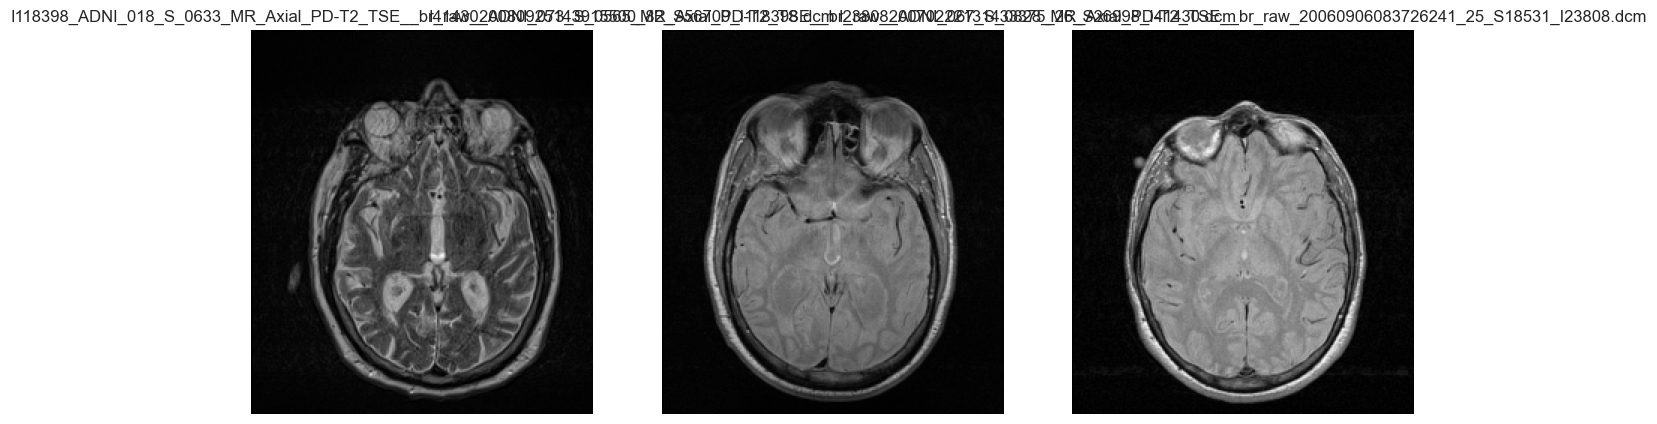

In [1]:
import os
import random
import matplotlib.pyplot as plt
import pydicom
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Specify the folder containing the middle DICOM slices
slices_folder = "AD_Slices"

# Combine current working directory with slices folder name
slices_folder_path = os.path.join(os.getcwd(), slices_folder)

# Get list of all files in the slices folder
slice_files = [f for f in os.listdir(slices_folder_path) if os.path.isfile(os.path.join(slices_folder_path, f))]

# Randomly select three files
random_files = random.sample(slice_files, 3)

# Display the random images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, file_name in enumerate(random_files):
    file_path = os.path.join(slices_folder_path, file_name)
    ds = pydicom.dcmread(file_path)
    axes[i].imshow(ds.pixel_array, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(file_name)

plt.show()


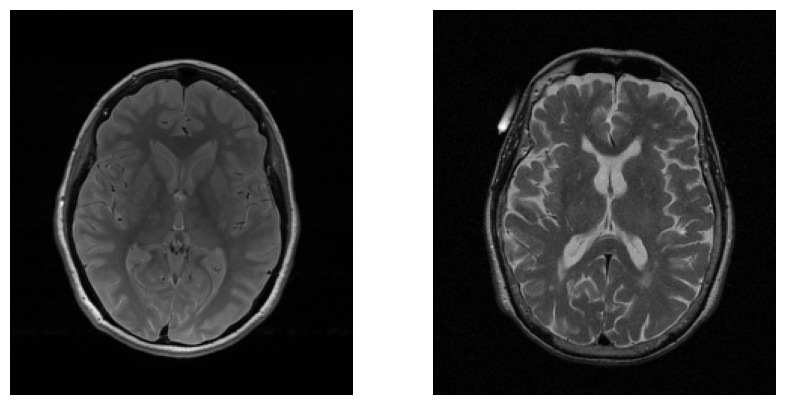

In [15]:
import os
import random
import matplotlib.pyplot as plt
import pydicom
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Specify the folder containing the middle DICOM slices
slices_folder = "AD_Slices"

# Combine current working directory with slices folder name
slices_folder_path = os.path.join(os.getcwd(), slices_folder)

# Get list of all files in the slices folder
slice_files = [f for f in os.listdir(slices_folder_path) if os.path.isfile(os.path.join(slices_folder_path, f))]

# Randomly select two files
random_files = random.sample(slice_files, 2)

# Display the random images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 2 subplots

for i, file_name in enumerate(random_files):
    file_path = os.path.join(slices_folder_path, file_name)
    ds = pydicom.dcmread(file_path)
    axes[i].imshow(ds.pixel_array, cmap='gray')
    axes[i].axis('off')
    # Remove the title setting line
    # axes[i].set_title(file_name)

# Save the figure with 300 DPI
plt.savefig("random_dicom_slices.png", dpi=300)

# Show the plot
plt.show()

